In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# IPL matches(2008-2020) Exploratory Data Analysis

TODO:
1. talk about EDA
2. talk about dataset (source, what it contains, how it will be useful)
3. Kaggle
3. Information about matches
4. Can use to depict player stats

# I. Data Preparation and Cleaning

1. Load the file using pandas.
2. Look at some information about the data & columns.
3. Fix any missing or incorrect values.

In [2]:
#Load data
matches = pd.read_csv(f'C:/Users/shubh/Learning/Project/IPL Complete Dataset (2008-2020)/IPL Matches 2008-2020.csv')
balls = pd.read_csv(f'C:/Users/shubh/Learning/Project/IPL Complete Dataset (2008-2020)/IPL Ball-by-Ball 2008-2020.csv')

In [3]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
balls

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [6]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [7]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
balls.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [9]:
#Percentage of missing values per column
Missing_match_data = matches.isnull().sum().sort_values(ascending = False)/len(matches)
print(Missing_match_data)
Missing_ball_data = balls.isnull().sum().sort_values(ascending = False)/len(balls)
Missing_ball_data

method             0.976716
result_margin      0.020833
city               0.015931
winner             0.004902
player_of_match    0.004902
eliminator         0.004902
result             0.004902
id                 0.000000
umpire1            0.000000
toss_winner        0.000000
toss_decision      0.000000
team2              0.000000
team1              0.000000
neutral_venue      0.000000
venue              0.000000
date               0.000000
umpire2            0.000000
dtype: float64


fielder             0.964935
player_dismissed    0.950922
dismissal_kind      0.950922
extras_type         0.947108
bowling_team        0.000987
inning              0.000000
batting_team        0.000000
is_wicket           0.000000
non_boundary        0.000000
id                  0.000000
extra_runs          0.000000
batsman_runs        0.000000
bowler              0.000000
non_striker         0.000000
batsman             0.000000
ball                0.000000
over                0.000000
total_runs          0.000000
dtype: float64

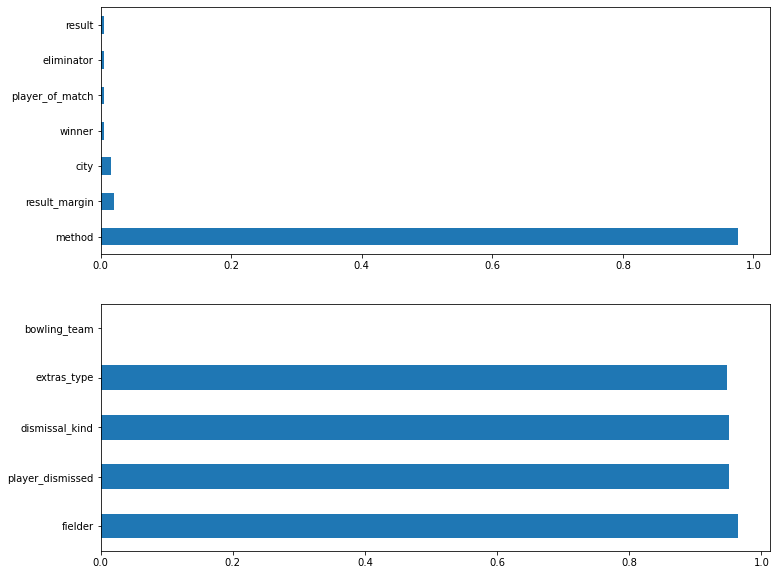

In [10]:
#Plotting missing percentage of data
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
Missing_match_data[Missing_match_data != 0].plot(kind = 'barh')
plt.subplot(2,1,2)
Missing_ball_data[Missing_ball_data != 0].plot(kind = 'barh')
plt.show()

# II. Exploratory Data Analysis on matches data set

In [11]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [12]:
balls.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [13]:
#To check no. of match played, teams participated and cities at which matches are played
print('Matches played so far : ',matches['id'].nunique())
print('\n Cities at which matches are played : ',matches['city'].unique())
print('\n Teams Participated : ', matches['team1'].unique())

Matches played so far :  816

 Cities at which matches are played :  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams Participated :  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [14]:
#Scrapping season year from the match date
#matches['season'] = pd.DatetimeIndex(matches['date']).year
matches['season'] = pd.to_datetime(matches['date']).dt.year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [15]:
#To check no. of matches played per season
match_per_season = matches.groupby(['season'])['id'].count().reset_index().rename(columns = {'id' : 'matches'})
match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


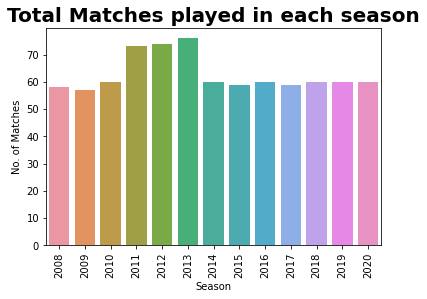

In [16]:
#Plotting no. of matches played per season
sns.countplot(matches['season'])
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season', fontsize = 10)
plt.ylabel('No. of Matches', fontsize = 10)
plt.title('Total Matches played in each season', fontsize = 20, fontweight = 'bold')
plt.show()

In [17]:
#Merging column of season from matches table to balls data using left join on id column
season_data = matches[['id','season']].merge(balls, left_on= 'id', right_on= 'id',how = 'left').drop('id',axis = 1)
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


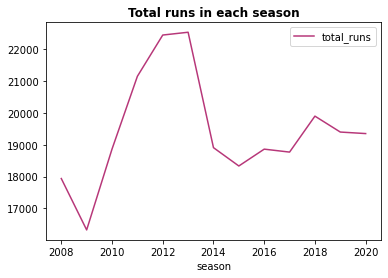

In [18]:
#Plotting total no. of runs scored per year
season = season_data.groupby(['season'])['total_runs'].sum().reset_index()
p = season.set_index('season')
ax = plt.axes()
ax.set(facecolor = 'white')
sns.lineplot(data = p, palette = 'magma')
plt.title('Total runs in each season', fontsize = 12, fontweight = 'bold')
plt.show()

In [19]:
# Printing matches played, total runs and avg. runs scored per match season wise
runs_per_season = pd.concat([match_per_season, season.iloc[:,1]], axis = 1)
runs_per_season['Runs_scored_per_match'] = runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('season', inplace = True)
runs_per_season

,matches,total_runs,Runs_scored_per_match
season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


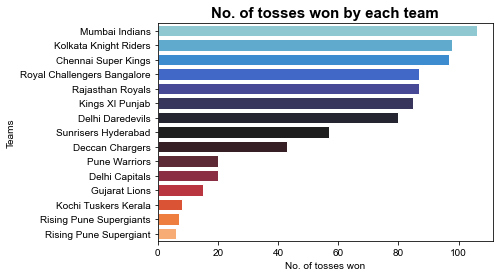

In [20]:
toss = matches['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'white')
sns.set(rc = {'figure.figsize':(15,10)}, style = 'darkgrid')
ax.set_title('No. of tosses won by each team', fontsize = 15, fontweight = 'bold')
sns.barplot(y = toss.index, x = toss, orient = 'h', palette = 'icefire', saturation =1)
plt.xlabel('No. of tosses won')
plt.ylabel('Teams')
plt.show()

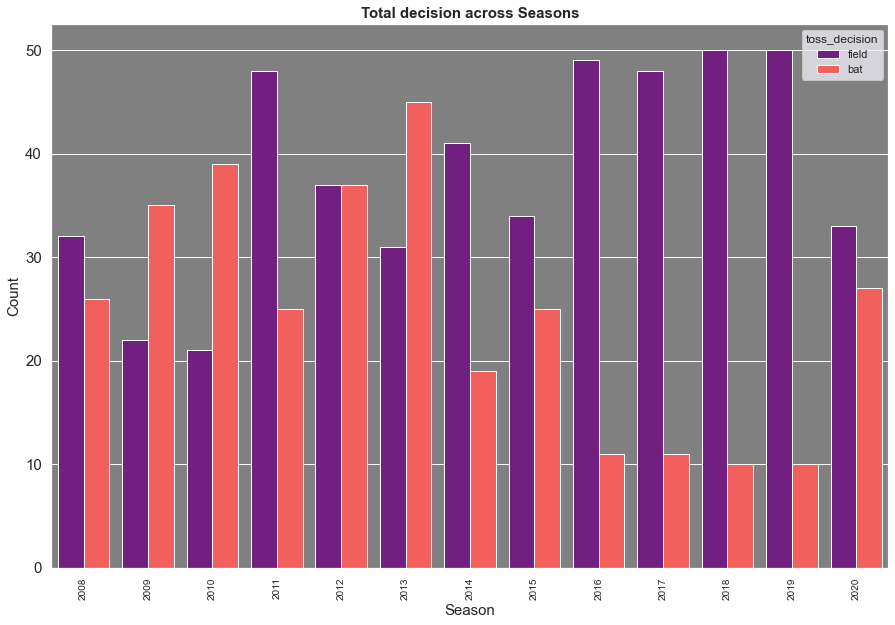

In [21]:
# plotting toss decision across seasons
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.countplot(x = 'season', hue = 'toss_decision', data = matches, palette = 'magma', saturation =1)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Total decision across Seasons', fontsize = 15, fontweight = 'bold')
plt.show()

In [22]:
matches['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [23]:
#Which stadium is best for winning by wickets
matches['venue'][matches.result != 'runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [24]:
#Which stadium is best for winning by runs
matches['venue'][matches.result != 'wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [25]:
#For any iven IPl team which stadium is best when they win the toss
for i in matches.team1.unique():
    print(f'Team name is {i}, Stadium Name {matches.venue[matches.toss_winner == i][matches.winner == i].mode()}')

Team name is Royal Challengers Bangalore, Stadium Name 0    M Chinnaswamy Stadium
Name: venue, dtype: object
Team name is Kings XI Punjab, Stadium Name 0    Punjab Cricket Association Stadium, Mohali
Name: venue, dtype: object
Team name is Delhi Daredevils, Stadium Name 0    Feroz Shah Kotla
Name: venue, dtype: object
Team name is Mumbai Indians, Stadium Name 0    Wankhede Stadium
Name: venue, dtype: object
Team name is Kolkata Knight Riders, Stadium Name 0    Eden Gardens
Name: venue, dtype: object
Team name is Rajasthan Royals, Stadium Name 0    Sawai Mansingh Stadium
Name: venue, dtype: object
Team name is Deccan Chargers, Stadium Name 0                   Barabati Stadium
1         Dr DY Patil Sports Academy
2                   Feroz Shah Kotla
3                          Kingsmead
4    MA Chidambaram Stadium, Chepauk
5                    SuperSport Park
Name: venue, dtype: object
Team name is Chennai Super Kings, Stadium Name 0    MA Chidambaram Stadium, Chepauk
Name: venue, dtype: 

In [26]:
#For any iven IPl team which stadium is best when they win the toss
matches.venue[matches.toss_winner == 'Mumbai Indians'][matches.winner == 'Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [27]:
#Best Chasing team
matches['winner'][matches.result != 'runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [28]:
#Best defending team
matches['winner'][matches.result != 'wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


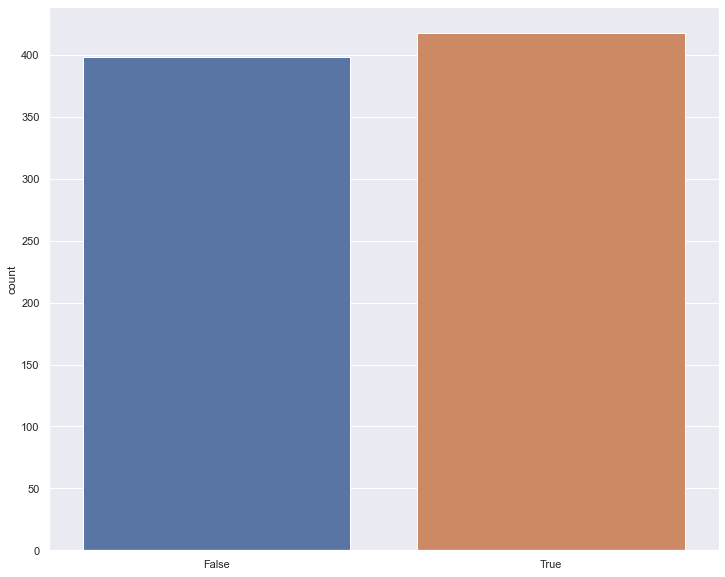

In [29]:
# Does winning the toss means winning the match
toss = matches['toss_winner'] == matches['winner']
plt.figure(figsize=(12,10))
sns.countplot(toss)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


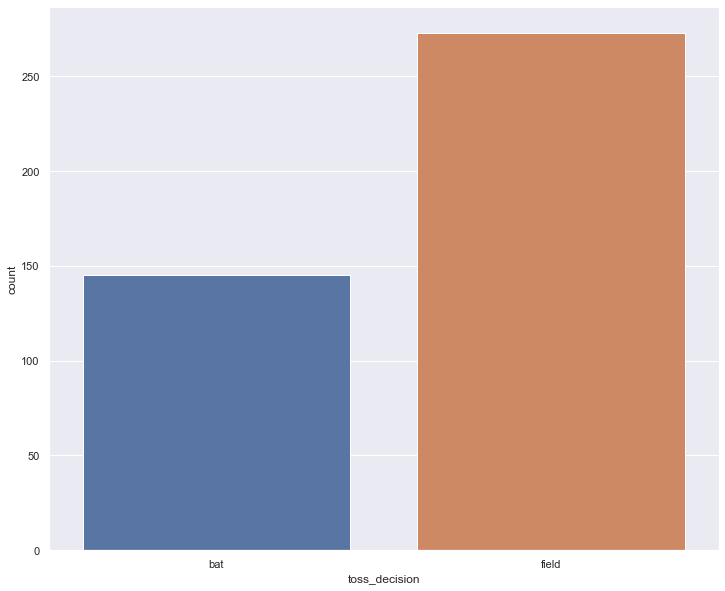

In [30]:
#Does chosing balling or batting first help in winning the match
plt.figure(figsize=(12,10))
sns.countplot(matches.toss_decision[matches.toss_winner == matches.winner])
plt.show()

In [31]:
#Match which is wonn by highest margin
matches[matches['result_margin'] == matches['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


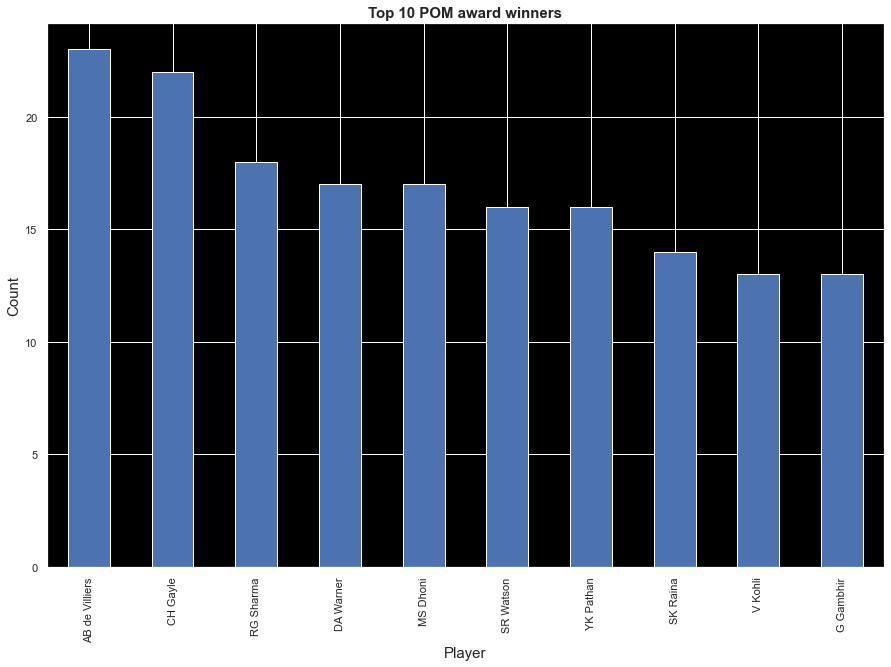

In [32]:
# Player earnin man of the match maximum no. of times
ax = plt.axes()
ax.set(facecolor = 'black')
matches.player_of_match.value_counts()[:10].plot(kind = 'bar')
plt.xlabel('Player', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Top 10 POM award winners', fontsize = 15, fontweight = 'bold')
plt.show()

# III. Using ball by ball dataset

In [33]:
#Extracting data of a player i.e. SK Raina
df_raina = balls[balls['batsman'] == 'SK Raina']
df_raina

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178795,1181768,2,7,5,SK Raina,SR Watson,RD Chahar,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178796,1181768,2,7,6,SK Raina,SR Watson,RD Chahar,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178797,1181768,2,8,1,SK Raina,SR Watson,MJ McClenaghan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178886,1181768,2,9,1,SK Raina,SR Watson,RD Chahar,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians


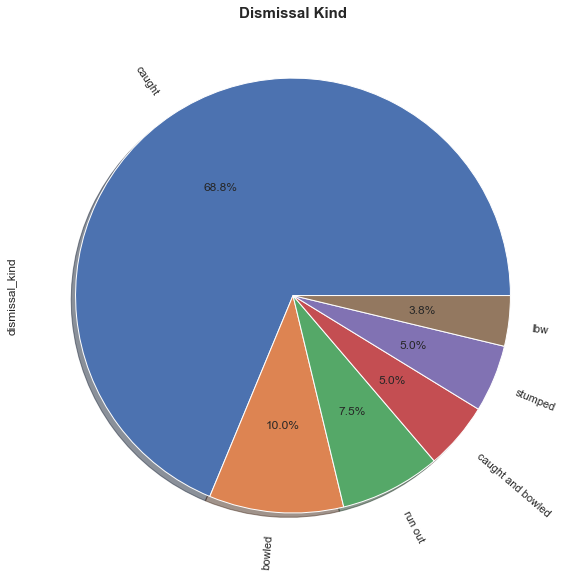

In [34]:
#Plotting dismissal kind of SK Raina
df_raina['dismissal_kind'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True, rotatelabels = True)
plt.title('Dismissal Kind', fontsize = 15, fontweight = 'bold')
plt.show()

In [35]:
#Runs scored by SK Raina in 1's,2's,3's,4's,6's
def count(df_raina, runs):
    return len(df_raina[df_raina['batsman_runs'] == runs])*runs

print(f"Runs Scored from 1's : {count(df_raina,1)}")
print(f"Runs Scored from 2's : {count(df_raina,2)}")
print(f"Runs Scored from 3's : {count(df_raina,3)}")
print(f"Runs Scored from 4's : {count(df_raina,4)}")
print(f"Runs Scored from 6's : {count(df_raina,6)}")

Runs Scored from 1's : 1666
Runs Scored from 2's : 528
Runs Scored from 3's : 33
Runs Scored from 4's : 1972
Runs Scored from 6's : 1164


In [36]:
# Top 10 runs scorer in IPL 
runs = balls.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['batsman','runs']
top_10_scorer = runs.sort_values(by = 'runs', ascending= False).head(10).reset_index().drop('index', axis = 1)
top_10_scorer

,batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


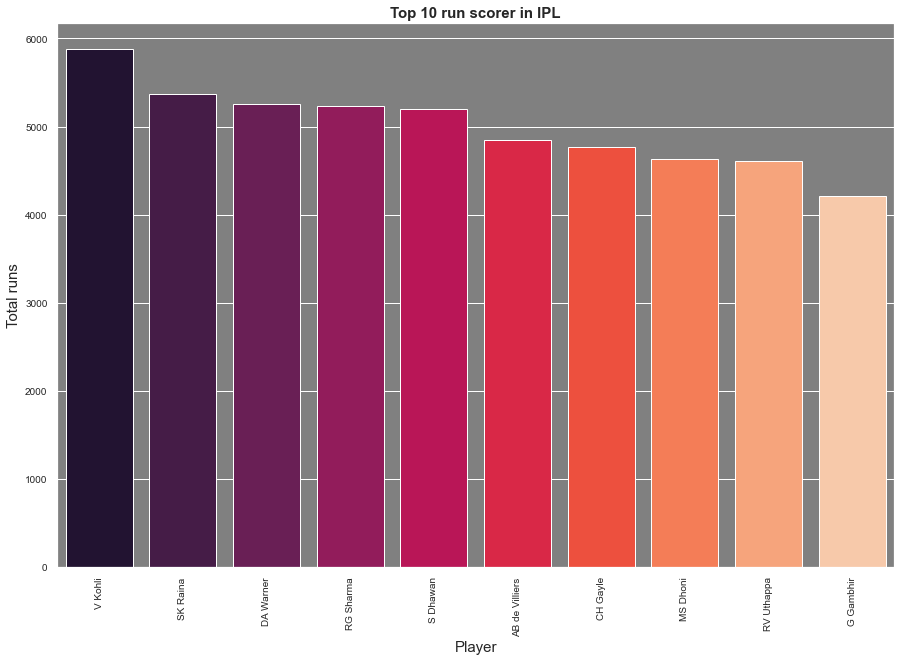

In [37]:
# Plotting Top 10 runs scorer in IPL 
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.barplot(y = top_10_scorer['runs'], x = top_10_scorer['batsman'],  palette = 'rocket', saturation =1)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Player', fontsize = 15)
plt.ylabel('Total runs', fontsize = 15)
plt.title('Top 10 run scorer in IPL', fontsize = 15, fontweight = 'bold')
plt.show()

# IV.Summary and Conclusion from match data
1. Total 816 matches are played from 2008 to 2020. In which max. matches(76) are played in 2013 and min. matches(57) are played in 2009.
2. Maximum no. of runs are scored in year 2013 as no. of matches are maximum also and min. no. of rus are scored in 2009 as no. of matches are min also.
3. Average no. of runs scored per match are highest in 2018 and lowerst in 2009.
4. Most of the tosses afre won by Mumbai Indians
5. In most of the seasons, especially in 2016 to 2020, toss winning team has decided to ball first.
6. Mostly teams has won by wickets i.e. field first.
7. Eden Gardens is best for winning by wickets
8. Feroz Shah Kotla is best for winning by runs
9. For most of the cricket team, its homeground is best place to win when they winn the toss.
10. KKR and MI are best chasing teams
11. MI is the best defending team.
12. Choosing to field first helps in winning the match
13. MI vs DD on 06/05/17 is won by maximum margin by MI in Feroz Shah Kotla stadium
14. AB de villiers have won highest no. of player of the match award

# V.Summary and Conclusion from balls data
1. Dismissal Kind of SK Raina is mostly by getting Caught.
2. SK Raina have scored highest no. of runs by 4's.
3. Virat Kohli is the top scorer in IPL 